# Experiments on Hydra Model

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

# import pandas as pd
import modin.pandas as pd
import time

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

In [2]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
PARAM_K2 = 0.1
PARAM_S0 = 400
PARAM_D = 40e-4
PARAM_V7 = 0.01
BEHAVIOR = 'contraction burst'
NUMX = 200
NUMY = 200
SAVE_INTERVAL = 50
STIMS_FAST = [1,3,5,7,9,12,15,18,22,26,31,36,42]
STIMS_SLOW = []

PROJECT = "c_200x200_100s_test_elongation"
NUMX = 200
NUMY = 200
TARGETFPS = 400

In [2]:
########## Test modin.pandas ###################
# import modin.pandas as pd
# import time
# import pandas

# start = time.time()
# pd.read_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/c_200x200_100s_ele_bottom_200_conductance.csv')
# print(time.time() - start)

# start = time.time()
# pandas.read_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/c_200x200_100s_ele_bottom_200_conductance.csv')
# print(time.time() - start)

## 100s, 389s

## 1. Test Active Elongation -- Sustained Ca Influx through LTCC

### 1.1 Load Data

In [3]:
PROJECT = "c_200x200_100s_test_elongation"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 15/10001 [00:00<01:08, 145.29it/s]

369.8258852958679


100%|██████████| 10001/10001 [01:03<00:00, 158.51it/s]


In [6]:
# Check Data Format
print(c.shape)
print(force.shape)

(10001, 40000)
(10001, 40000)


### 1.2 Visualize Data as Frames

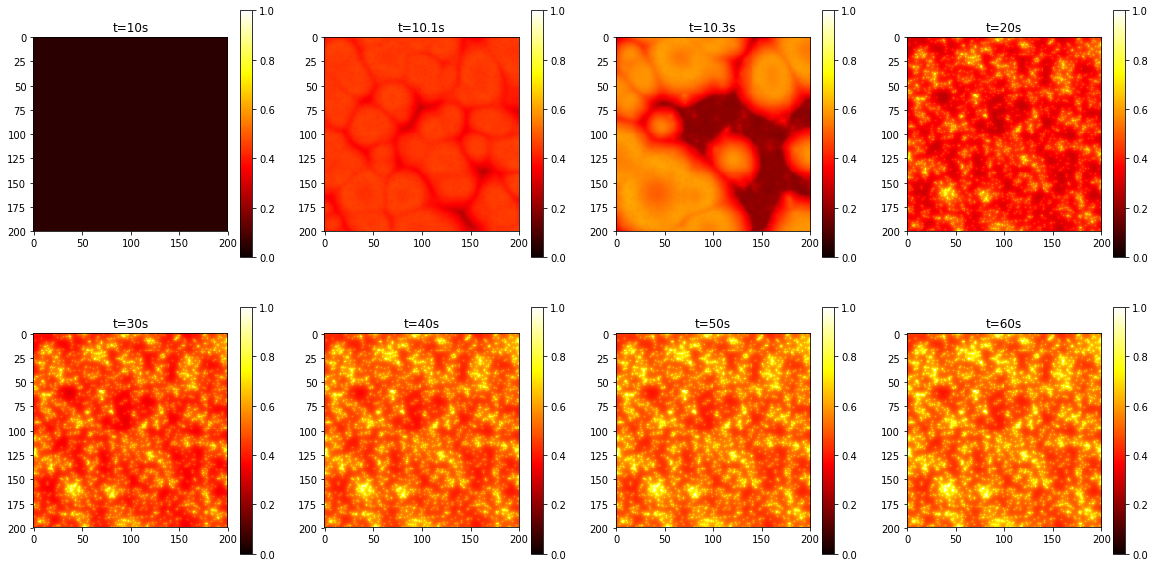

In [7]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

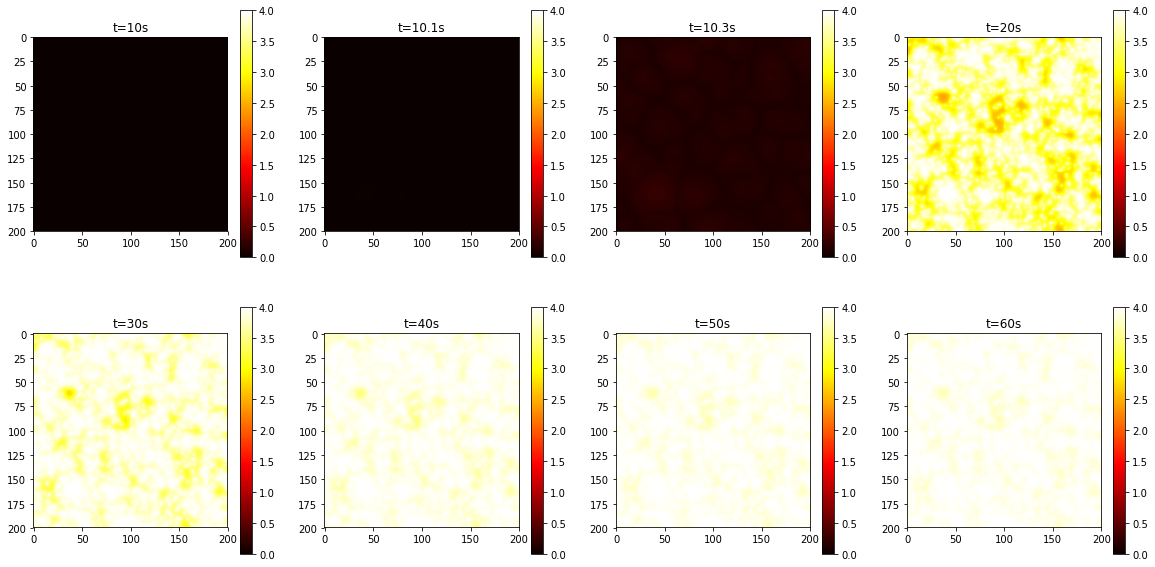

In [8]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

### 1.3 Visualize Data as Curves

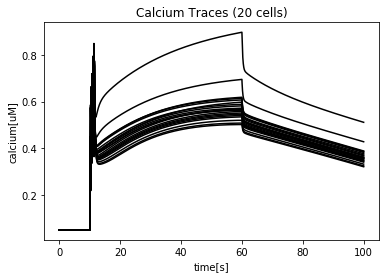

In [9]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

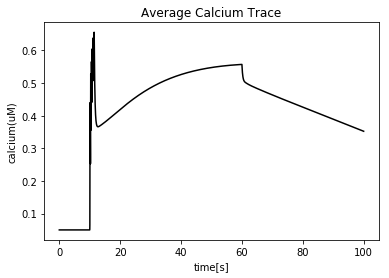

In [10]:
save_curve(x=np.mean(c, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium(uM)",
           title="Average Calcium Trace",
           filename=None,
           show=True, 
           save=False)

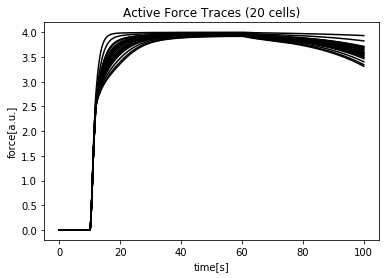

In [13]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

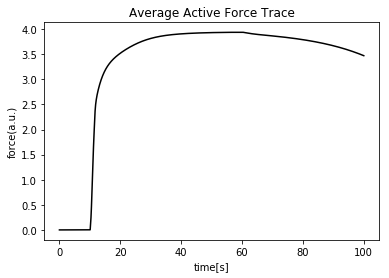

In [14]:
save_curve(x=np.mean(force, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force(a.u.)",
           title="Average Active Force Trace",
           filename=None,
           show=True, 
           save=False)

## 2. Test Active Elongation -- IP3-induced Ca Release, Multiple Stimulation

In [5]:
PROJECT = "c_200x200_100s_elong"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 9/5000 [00:00<00:59, 84.41it/s]

242.71756529808044


100%|██████████| 5000/5000 [01:01<00:00, 81.52it/s]


In [8]:
TOTAL_TIME = 100
TIME_STEP = 0.0004

In [9]:
# Check Data Format
print(c.shape)
print(force.shape)

(5000, 40000)
(5000, 40000)


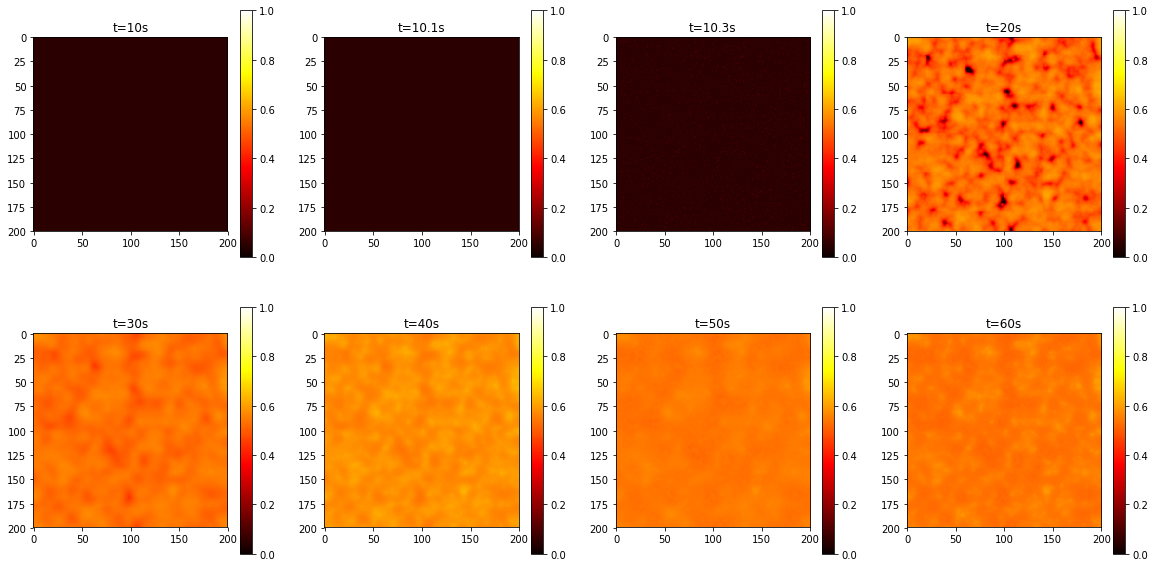

In [10]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

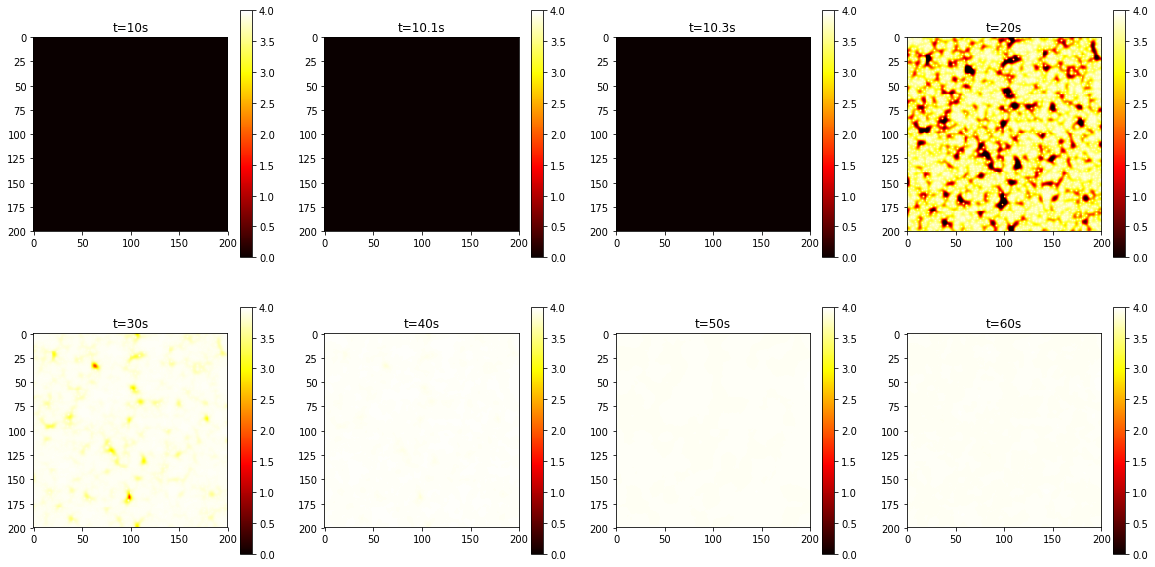

In [11]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

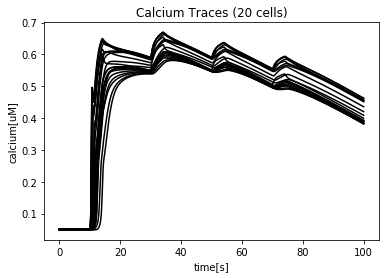

In [12]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

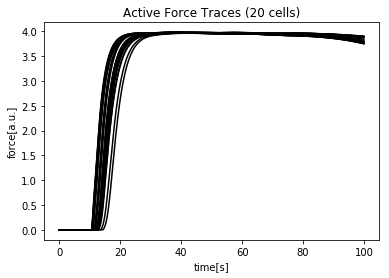

In [13]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

## 3. Test Active Elongation -- IP3-induced Ca Release, Longer Stimulation

In [4]:
PROJECT = "c_200x200_100s_elongation_stim_20s"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 16/5000 [00:00<00:32, 151.42it/s]

213.5576536655426


100%|██████████| 5000/5000 [00:34<00:00, 147.02it/s]


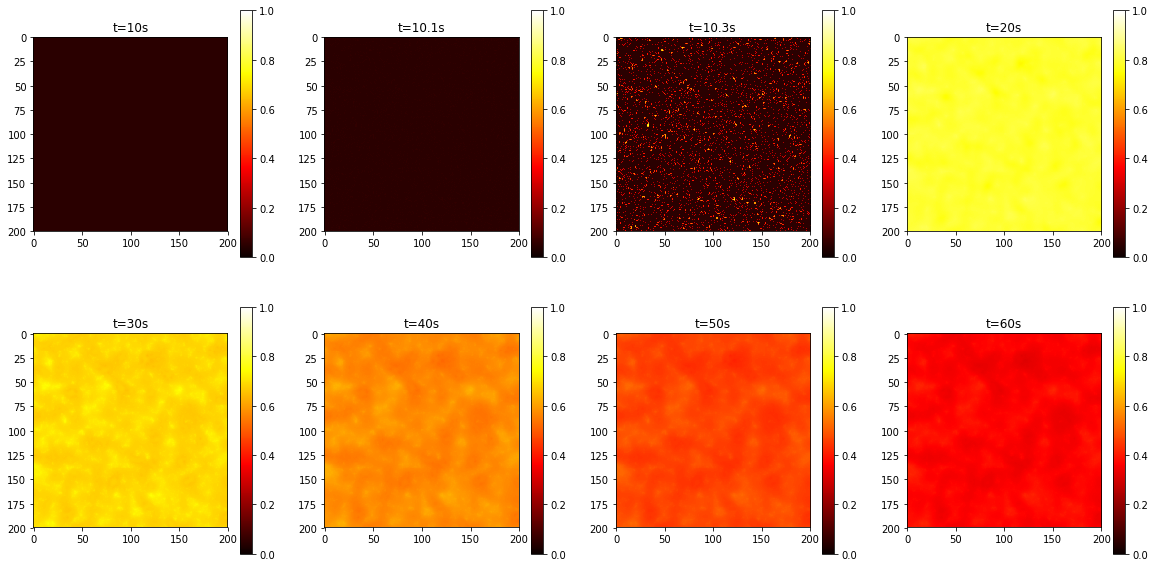

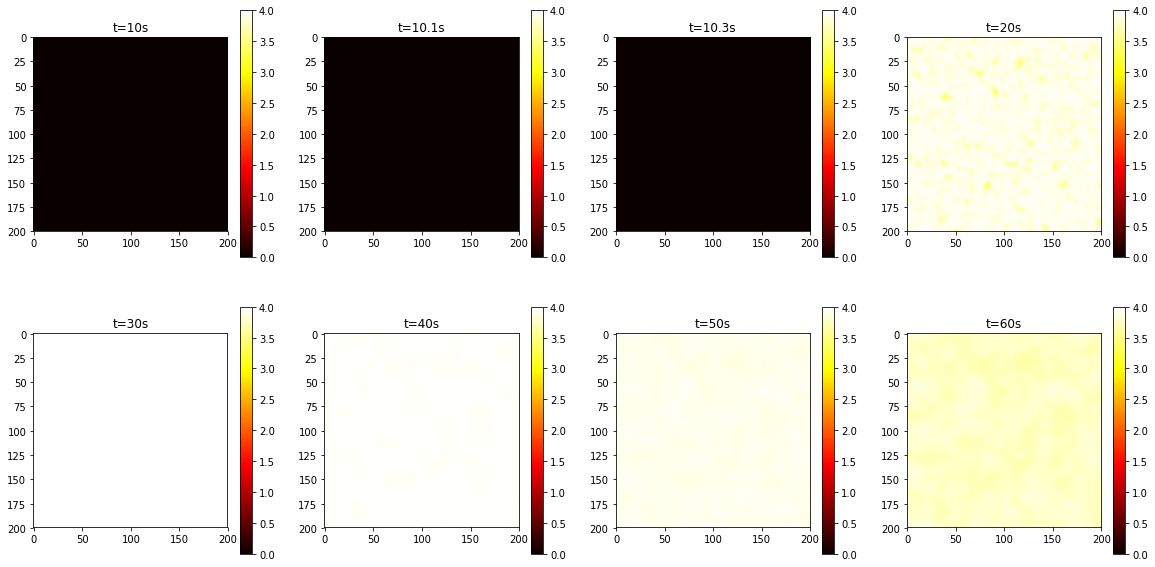

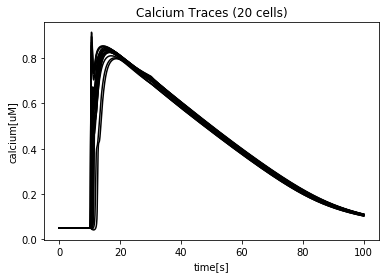

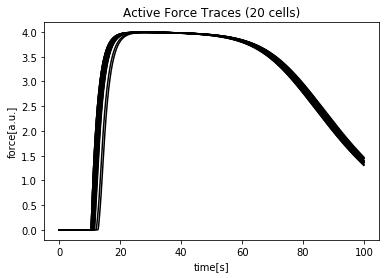

In [5]:
TOTAL_TIME = 100
TIME_STEP = 0.0004
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

## 3. Test Contraction Bursts -- Stimulated Bottom Ring with gc=5

### 3.1 Load Data

In [6]:
PROJECT = "c_200x200_100s_ele_bottom_5_conductance"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 13/10000 [00:00<01:17, 129.24it/s]

413.89538860321045


100%|██████████| 10000/10000 [01:13<00:00, 135.54it/s]


In [7]:
# Check Data Format
print(c.shape)
print(force.shape)

(10000, 40000)
(10000, 40000)


### 3.2 Visualize Data as Frames

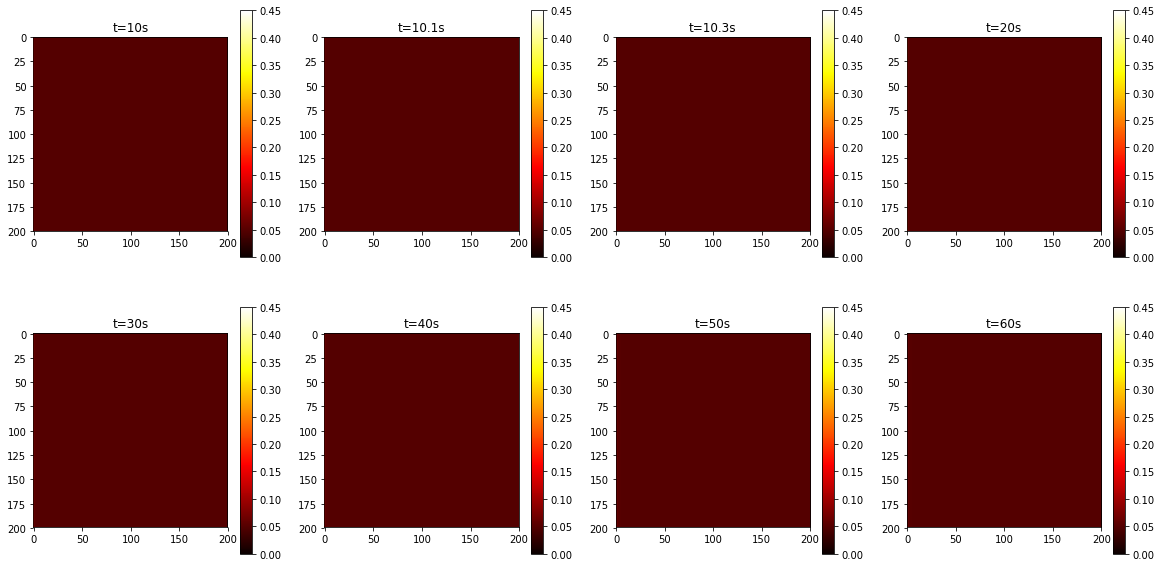

In [10]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TOTAL_TIME = 100
TIME_STEP = 0.0002
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 0.45)

### 3.3 Visualize Data as Curves

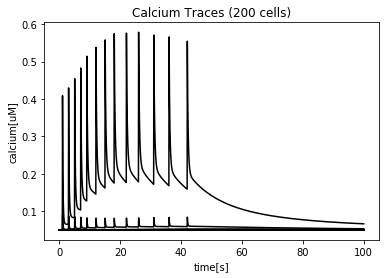

In [15]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,19900:20100],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (200 cells)",
           filename=None,
           show=True, 
           save=False)

## 4. Test Contraction Bursts -- Stimulated Random Cells with gc=5

In [5]:
PROJECT = "c_200x200_100s_ele_random_5_conductance"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

TOTAL_TIME = 100
TIME_STEP = 0.0002

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

100%|██████████| 10000/10000 [01:19<00:00, 125.63it/s]


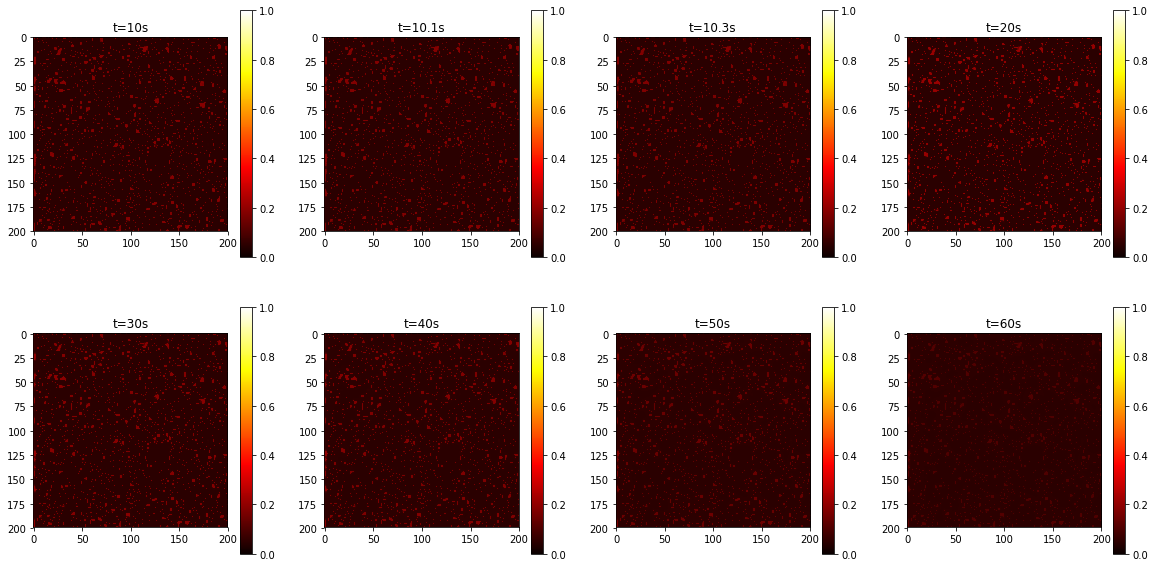

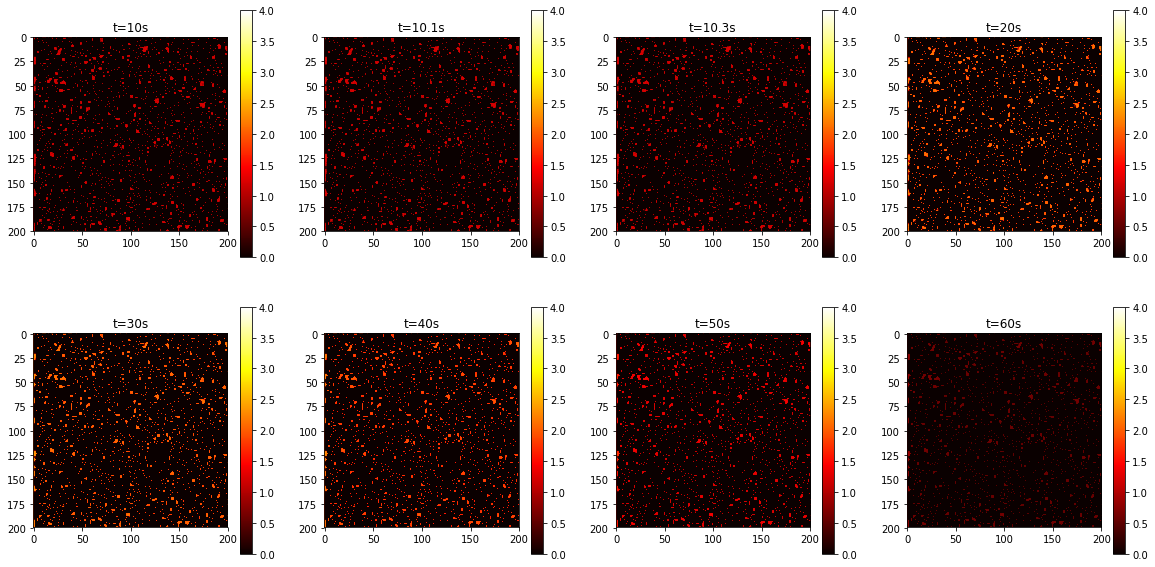

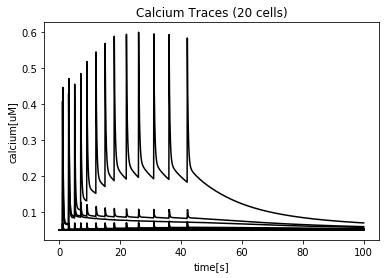

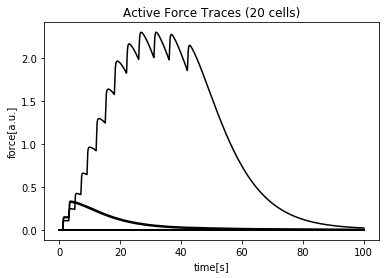

In [6]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

## 5. Test Contraction Bursts -- Stimulated Bottom Ring with gc=20

In [4]:
PROJECT = "200x200_100s_ele_bottom_20_conductance"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

TOTAL_TIME = 100
TIME_STEP = 0.0002

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 13/10000 [00:00<01:18, 126.93it/s]

437.1503486633301


100%|██████████| 10000/10000 [01:13<00:00, 137.67it/s]


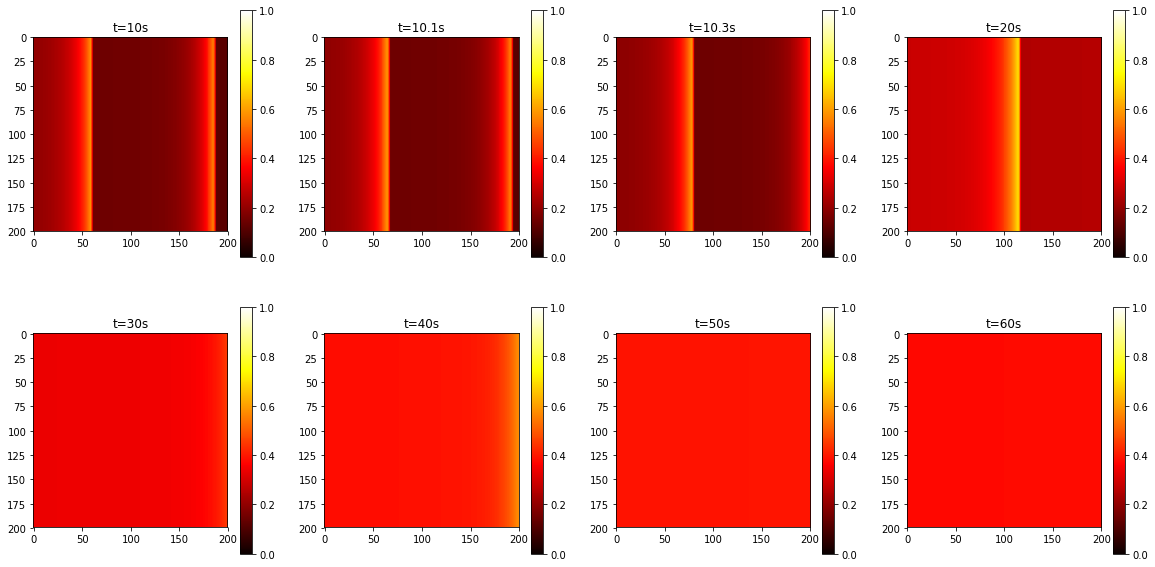

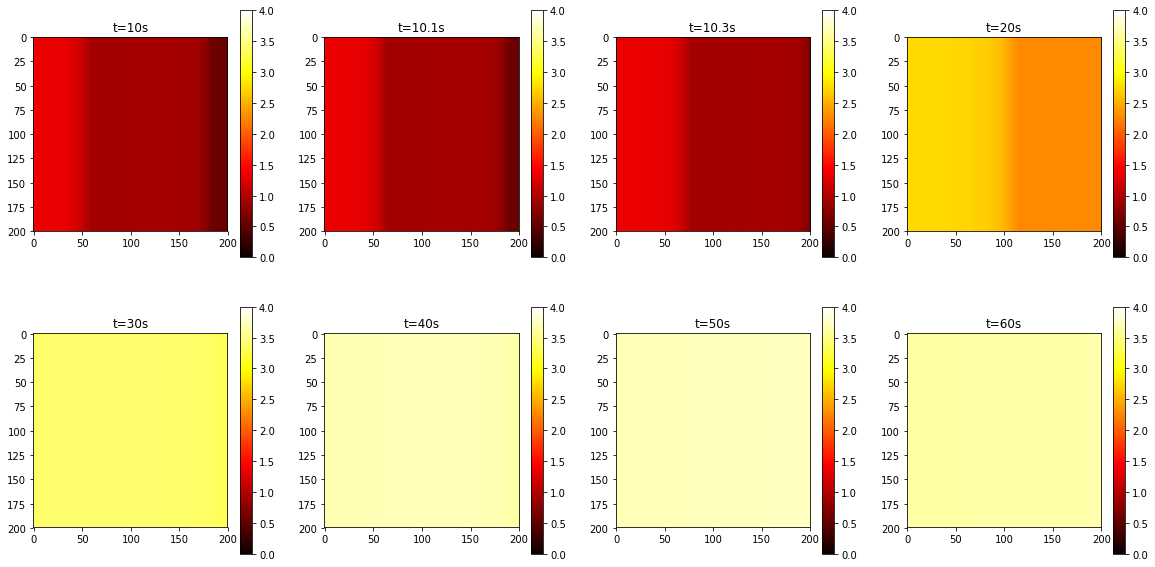

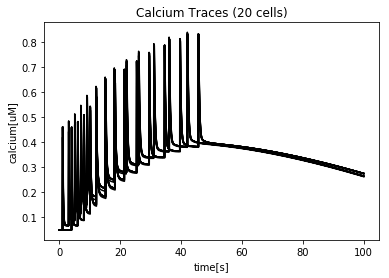

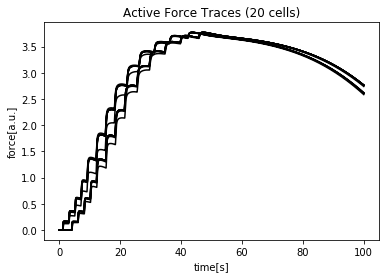

In [5]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

## 6. Test Contraction Bursts -- Stimulated Random Cells with gc=20

In [5]:
PROJECT = "c_200x200_100s_ele_random_20_conductance"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

TOTAL_TIME = 100
TIME_STEP = 0.0002

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 12/10000 [00:00<01:26, 115.29it/s]

428.47045516967773


100%|██████████| 10000/10000 [01:18<00:00, 126.85it/s]


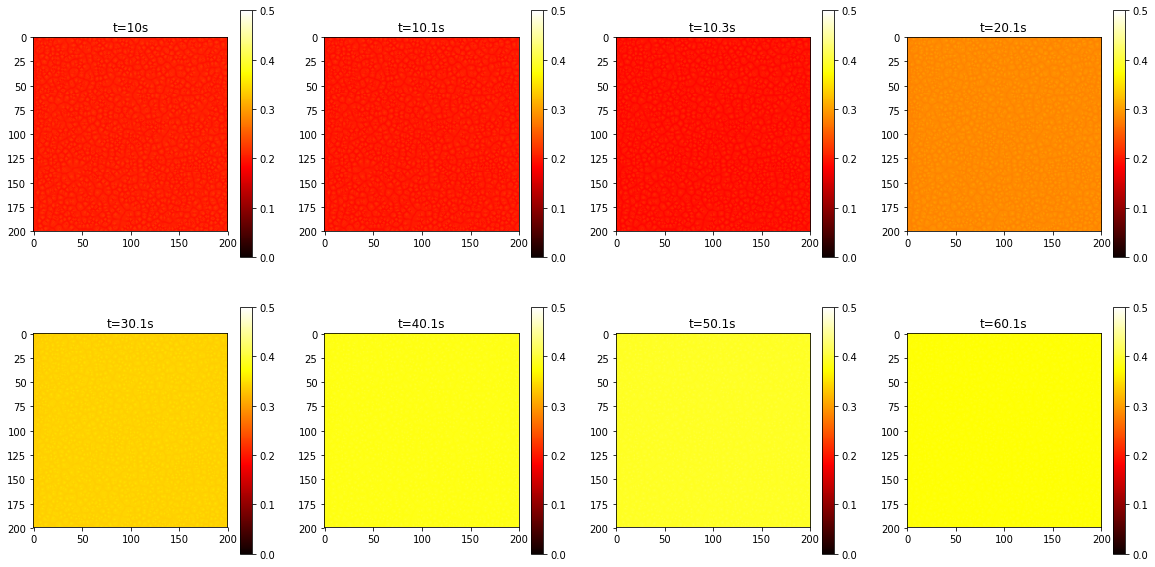

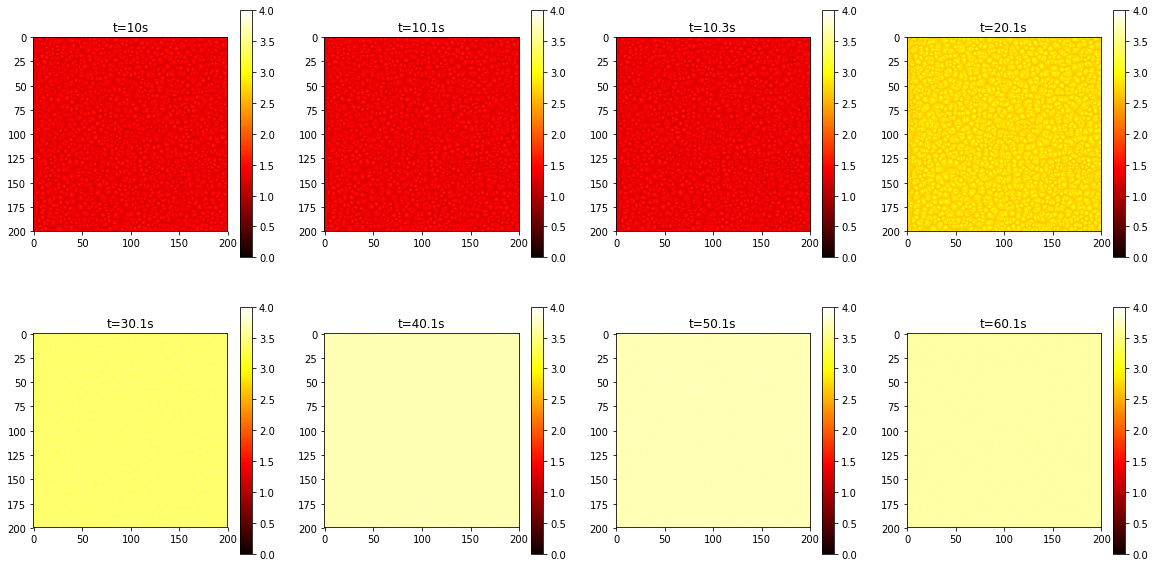

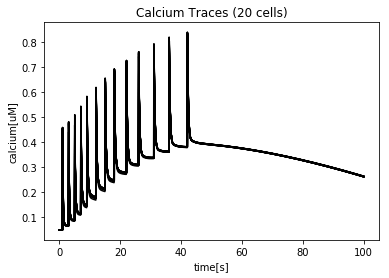

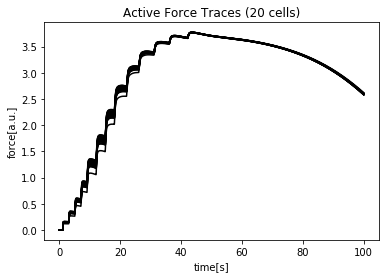

In [9]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20.1, 30.1, 40.1, 50.1, 60.1]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 0.5)

# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20.1, 30.1, 40.1, 50.1, 60.1]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

## 7. Test Active Elongation -- IP3-induced Ca Release, 4s Stimulation

In [10]:
PROJECT = "200x200_100s_elongation_single_stim"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 6/10000 [00:00<02:49, 58.98it/s]

439.12252473831177


100%|██████████| 10000/10000 [01:21<00:00, 123.18it/s]


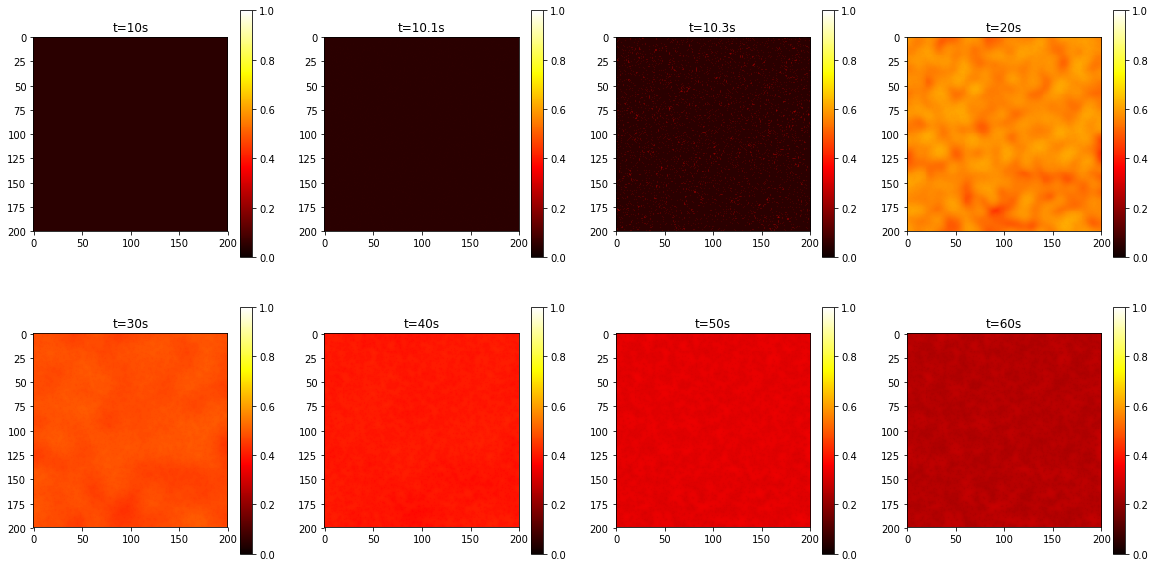

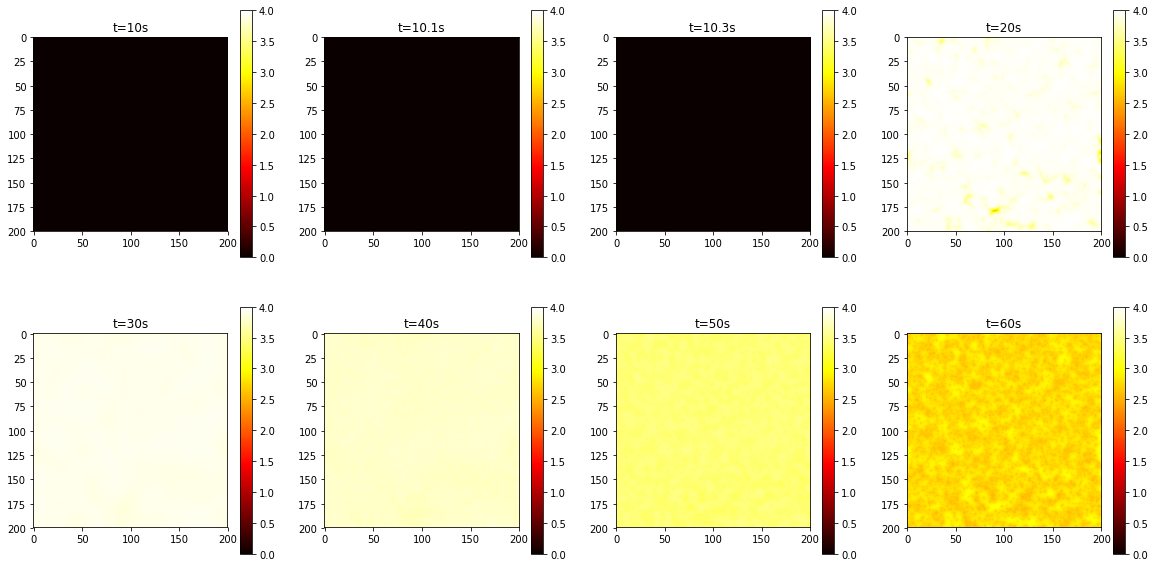

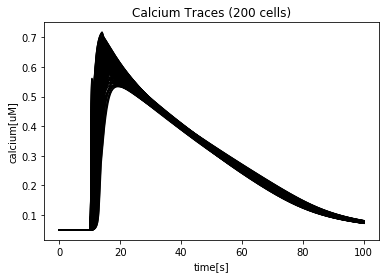

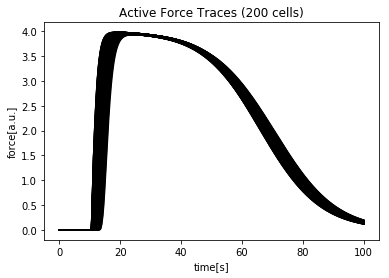

In [17]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 10.1, 10.3, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9900:10100],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (200 cells)",
           filename=None,
           show=True, 
           save=False)

save_curve(x=force[:,9900:10100],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (200 cells)",
           filename=None,
           show=True, 
           save=False)

In [19]:
df = pd.DataFrame(force)
df.to_csv('../results/data/force/200x200_100s_elongation_single_stim.csv', index = False)